# ANOVA 

ANOVA, short for Analysis of Variance, is a commonly used statistical method for comparing means using the calculated F-statistic of 3 groups or more.  

<center><img src='rsz_anova-800x444.jpg'>
    
Like all tests, we calculate a statistic (F-ratio or F-statistic) to get a p-value to compare with the critical value

## Let's look at an example

A company is wondering how they can best optimize the performance of their data scientists. They devise an experiment to test the effect of various substances on the quality of work completed by their data scientists. They come up with four groups:

      Group A:  Given 150mg of caffeine
      Group B:  Given 2 ounces of alcohol
      Group C:  Given 100g of chocolate
      Group D:  Given 10 ounces of water
After ingesting their given substance, each data scientist was then given the same assessment. After two hours, the accuracy of each data scientist's model was evaluated and recorded and the results are shown below. With a confidence level of 95%, is there a difference in performance across the groups?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

from scipy import stats

In [3]:
A = [0.92, 0.89, 0.94, 0.91, 0.79, 0.90, 0.96, 0.94, 0.92, 0.85]
B = [0.65, 0.79, 0.99, 0.48, 0.54, 0.68, 0.52, 0.49, 0.52, 0.56]
C = [0.85, 0.89, 0.91, 0.92, 0.86, 0.82, 0.94, 0.90, 0.91, 0.95]
D = [0.69, 0.75, 0.85, 0.74, 0.76, 0.85, 0.78, 0.72, 0.84, 0.86]

In [4]:
f_stat,p_value = stats.f_oneway(A,B,C,D)
print('F-stat:',f_stat)
print('p-value:',p_value)

F-stat: 19.986414188904373
p-value: 8.500667468792516e-08


## What is the f-statistic? 
<center><img src='f-stat.png'>
    
The test statistic for ANOVA follows the F-distribution, a continuous probability function with 2 unique values, the degrees of freedom of groups and the degrees of freedom of all subjects. It is positively skewed and defined only for positive values. 

If, a = number of groups AND N = total number of subjects THEN 
- Degrees of freedom numerator = a - 1
- Degrees of freedom denominator = N - a



/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


Text(0.5, 0, 'F-statistic')

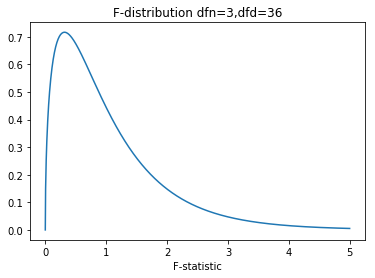

In [5]:
x = np.linspace(0,5,1000)
y = stats.f.pdf(x,3,36)
plt.plot(x,y)
plt.title('F-distribution dfn=3,dfd=36')
plt.xlabel('F-statistic')

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


Text(0.5, 0, 'F-statistic')

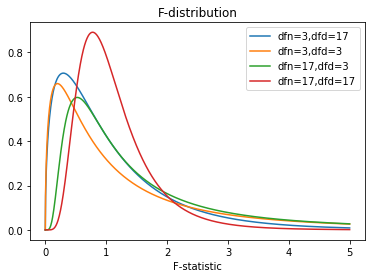

In [6]:
x = np.linspace(0,5,1000)
y = stats.f.pdf(x,3,16)
plt.plot(x,y)
y = stats.f.pdf(x,3,3)
plt.plot(x,y)
y = stats.f.pdf(x,16,3)
plt.plot(x,y)
y = stats.f.pdf(x,16,16)
plt.plot(x,y)
plt.legend(['dfn=3,dfd=17','dfn=3,dfd=3','dfn=17,dfd=3','dfn=17,dfd=17'])
plt.title('F-distribution')
plt.xlabel('F-statistic')

**Now that we know a bit more about the f-statistic, what do we do with it? The one-way ANOVA test is a right-tailed test: if the test statistic exceeds the critical value, the null hypothesis is rejected. We calculate the critical value by looking at an F-distribution table with an alpha value = 0.05. The top row of the table represents the numerator degrees of freedom and the first column represents the denominator degrees of freedom.**

- test-statistic = 19.98
- critical-value = 2.88 


<center><img src='Fchart.png'>

**Can we reject the null-hypothesis?** 
Yes, our f-statistic falls within the critical region. 